Category
Environmental    503.812203
Governance       482.303511
Social           519.270613
Name: Value, dtype: float64


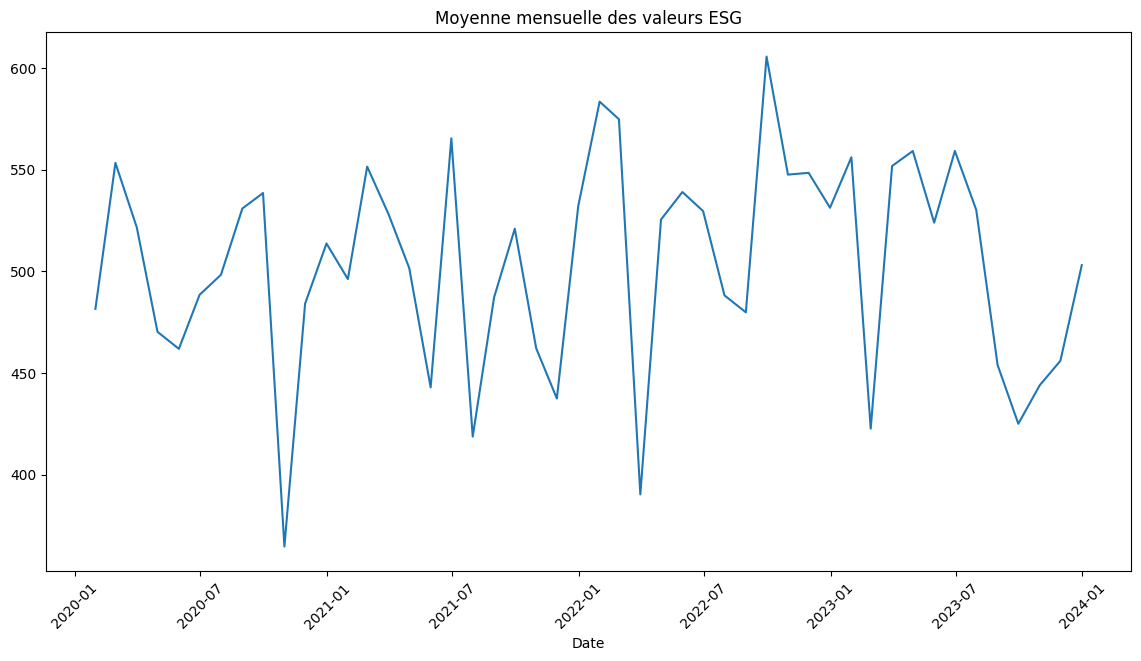

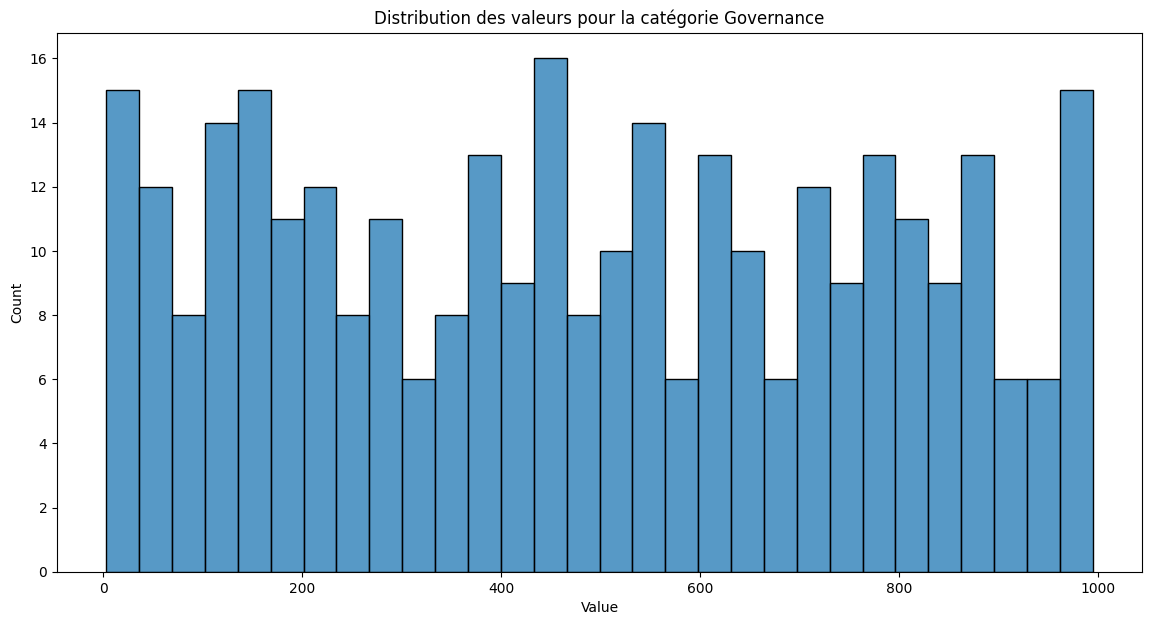

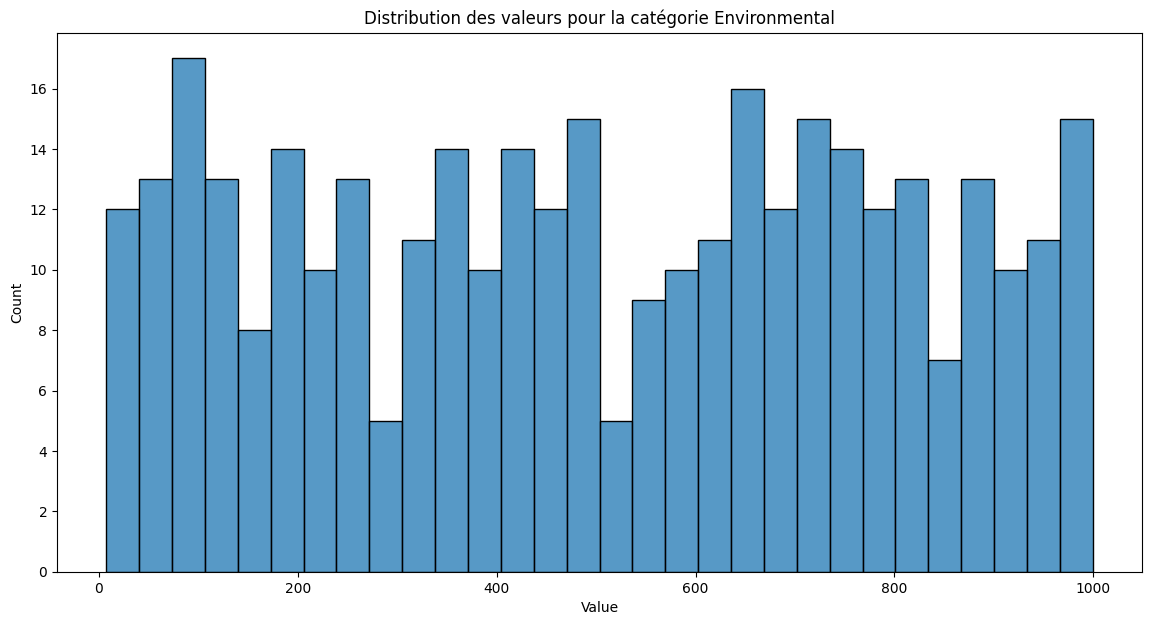

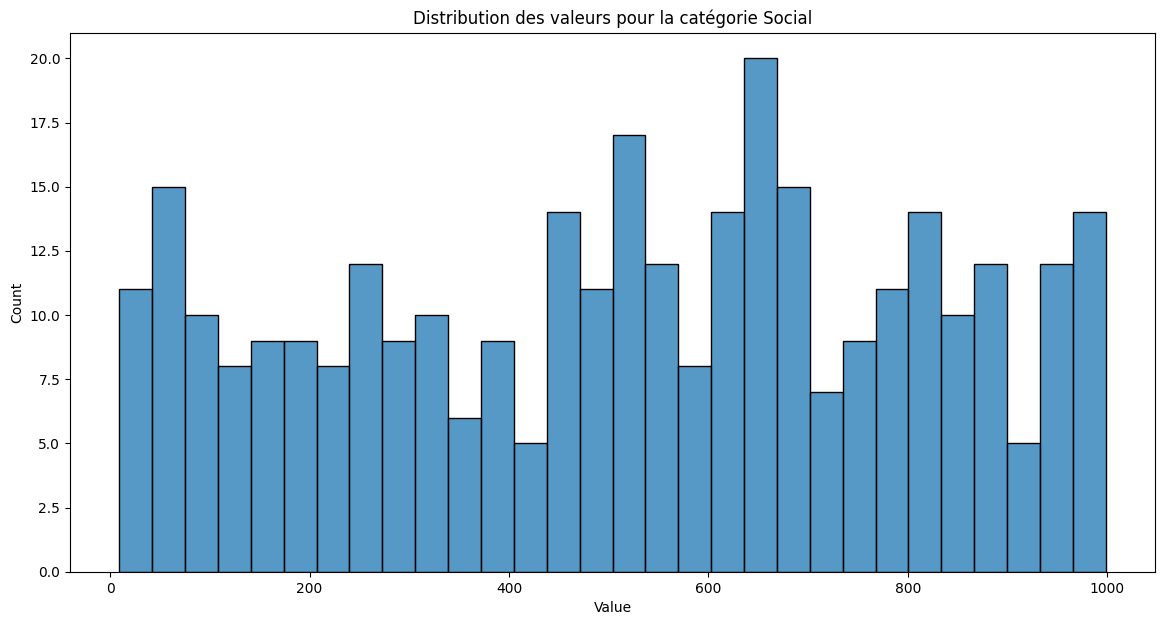

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Charger les données traitées
df = pd.read_csv('/Users/omarhaddad/Desktop/ESG_analysis/data/processed/processed_esg_data.csv')

# Convertir la colonne 'Value' en numérique, en remplaçant les erreurs par NaN
df['Value'] = pd.to_numeric(df['Value'], errors='coerce')

# Supprimer les lignes avec des valeurs manquantes après la conversion
df = df.dropna(subset=['Value'])

# Analyse des tendances
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Moyenne des valeurs ESG par catégorie
mean_values = df.groupby('Category')['Value'].mean()
print(mean_values)

# Analyse de la saisonnalité (exemple : variation mensuelle)
monthly_mean = df['Value'].resample('ME').mean()  # Utilisation de 'ME' pour la fin du mois

plt.figure(figsize=(14, 7))
sns.lineplot(x=monthly_mean.index, y=monthly_mean.values)
plt.title('Moyenne mensuelle des valeurs ESG')
plt.xticks(rotation=45)
plt.show()

# Analyse par catégorie
for category in df['Category'].unique():
    category_df = df[df['Category'] == category]
    plt.figure(figsize=(14, 7))
    sns.histplot(data=category_df, x='Value', bins=30)
    plt.title(f'Distribution des valeurs pour la catégorie {category}')
    plt.show()
